**Elevate Labs Internship Task 3**


`1. Import Libraries & Dataframe Loading`

In [6]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("Housing.csv")

# Preview the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


`2. Initial Inspection (shape, info(), describe())`

In [8]:
# Dataset dimensions
print("Dataset shape:", df.shape)

# Info and nulls
df.info()

# Describe numeric features
df.describe()


Dataset shape:
 (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


`3. Handling Missing Values`

In [9]:
# Check for null values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


`4. Simple Linear Regression (area → price)`

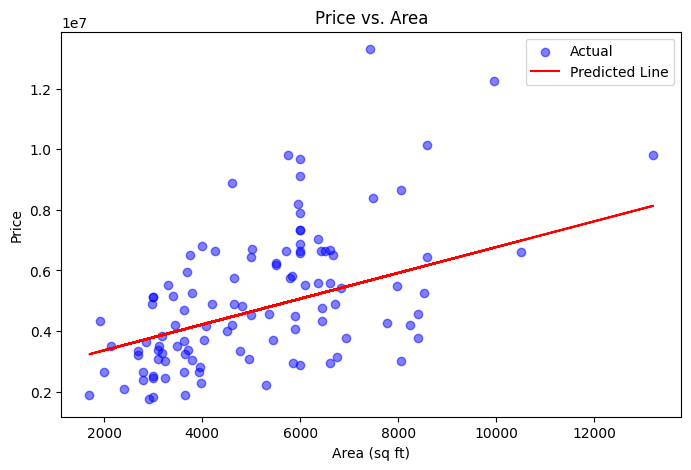

MAE : 1474748.1337969352
MSE : 3675286604768.185
R²  : 0.27287851871974644
Slope (coefficient): 425.72984193878284
Intercept: 2512254.2639593435


In [11]:
# Define input and output
X_simple = df[['area']]
y = df['price']

# Split data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train model
lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)

# Predict
y_pred_s = lr_simple.predict(X_test_s)

# Plot regression
plt.figure(figsize=(8,5))
plt.scatter(X_test_s, y_test_s, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted Line')
plt.title("Price vs. Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend()
plt.show()

# Simple Regression Metrics
print("MAE :", mean_absolute_error(y_test_s, y_pred_s))
print("MSE :", mean_squared_error(y_test_s, y_pred_s))
print("R²  :", r2_score(y_test_s, y_pred_s))

# Interpretation
print("Slope (coefficient):", lr_simple.coef_[0])
print("Intercept:", lr_simple.intercept_)


`5. Multiple Linear Regression (All Features)`

In [13]:
# Define features and target
X_multi = df.drop("price", axis=1)
y_multi = df["price"]

# Identify categorical and numeric columns
cat_cols = X_multi.select_dtypes(include='object').columns.tolist()
num_cols = X_multi.select_dtypes(include=np.number).columns.tolist()

# Preprocessing: One-hot encode categorical variables
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')

# Pipeline with preprocessing + model
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])

# Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train_m, y_train_m)

# Predict
y_pred_m = pipeline.predict(X_test_m)

# model evaluation
print("Multiple Linear Regression Metrics:")
print("MAE :", mean_absolute_error(y_test_m, y_pred_m))
print("MSE :", mean_squared_error(y_test_m, y_pred_m))
print("R²  :", r2_score(y_test_m, y_pred_m))



Multiple Linear Regression Metrics:
MAE : 970043.4039201695
MSE : 1754318687330.703
R²  : 0.6529242642153106


`6. Interpretation of Coefficients`

In [15]:
# Get column names after one-hot encoding
encoded_columns = pipeline.named_steps['prep'].transformers_[0][1].get_feature_names_out(cat_cols)
all_columns = np.concatenate([encoded_columns, num_cols])

# Create dataframe of coefficients
coefs = pipeline.named_steps['model'].coef_
coef_df = pd.DataFrame({
    'Feature': all_columns,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

coef_df.head(10)


,Feature,Coefficient
10,bathrooms,1.094445e+06
4,airconditioning_yes,7.914267e+05
3,hotwaterheating_yes,6.846499e+05
5,prefarea_yes,6.298906e+05
7,furnishingstatus_unfurnished,-4.136451e+05
11,stories,4.074766e+05
2,basement_yes,3.902512e+05
0,mainroad_yes,3.679199e+05
1,guestroom_yes,2.316100e+05
12,parking,2.248419e+05


**6. Bivariate Analysis (Survival vs. Features)**

`6.1 Survival Rate by Gender (sex)`

Survival rate by gender:
 • Female: 0.74 (74.2% survived)
 • Male  : 0.19 (18.9% survived)


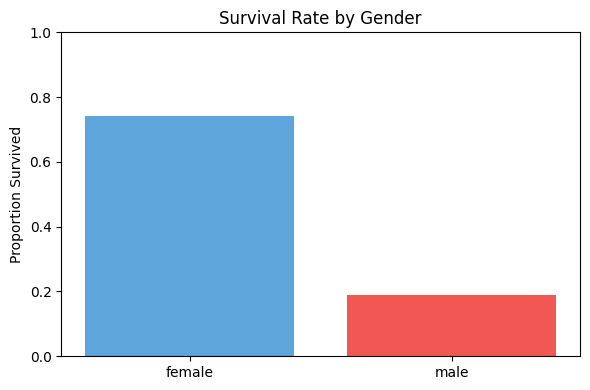

In [22]:
# ---------------------------------------------------------
# 11. SURVIVAL RATE BY GENDER
# ---------------------------------------------------------
# Group by 'sex', compute the mean of 0/1 'survived'
gender_survival = df.groupby('sex')['survived'].mean()

print("Survival rate by gender:")
for gender, rate in gender_survival.items():
    print(f" • {gender.capitalize():6s}: {rate:.2f} ({rate*100:.1f}% survived)")

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(
    gender_survival.index,
    gender_survival.values,
    color=['#5DA5DA', '#F15854']
)
plt.title("Survival Rate by Gender")
plt.ylabel("Proportion Survived")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


`6.2 Survival Rate by Passenger Class (pclass)`

Survival rate by passenger class:
 • Class 1: 0.63 (63.0% survived)
 • Class 2: 0.47 (47.3% survived)
 • Class 3: 0.24 (24.2% survived)


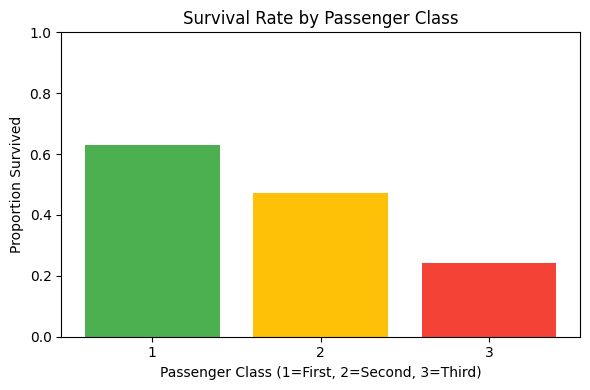

In [23]:
# ---------------------------------------------------------
# 12. SURVIVAL RATE BY 'pclass' (1st/2nd/3rd)
# ---------------------------------------------------------
pclass_survival = df.groupby('pclass')['survived'].mean()

print("Survival rate by passenger class:")
for cls, rate in pclass_survival.items():
    print(f" • Class {cls}: {rate:.2f} ({rate*100:.1f}% survived)")

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(
    [str(cls) for cls in pclass_survival.index],
    pclass_survival.values,
    color=['#4CAF50', '#FFC107', '#F44336']
)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Proportion Survived")
plt.ylim(0, 1)
plt.xlabel("Passenger Class (1=First, 2=Second, 3=Third)")
plt.tight_layout()
plt.show()


`7. Pairplot & Correlation Matrix`

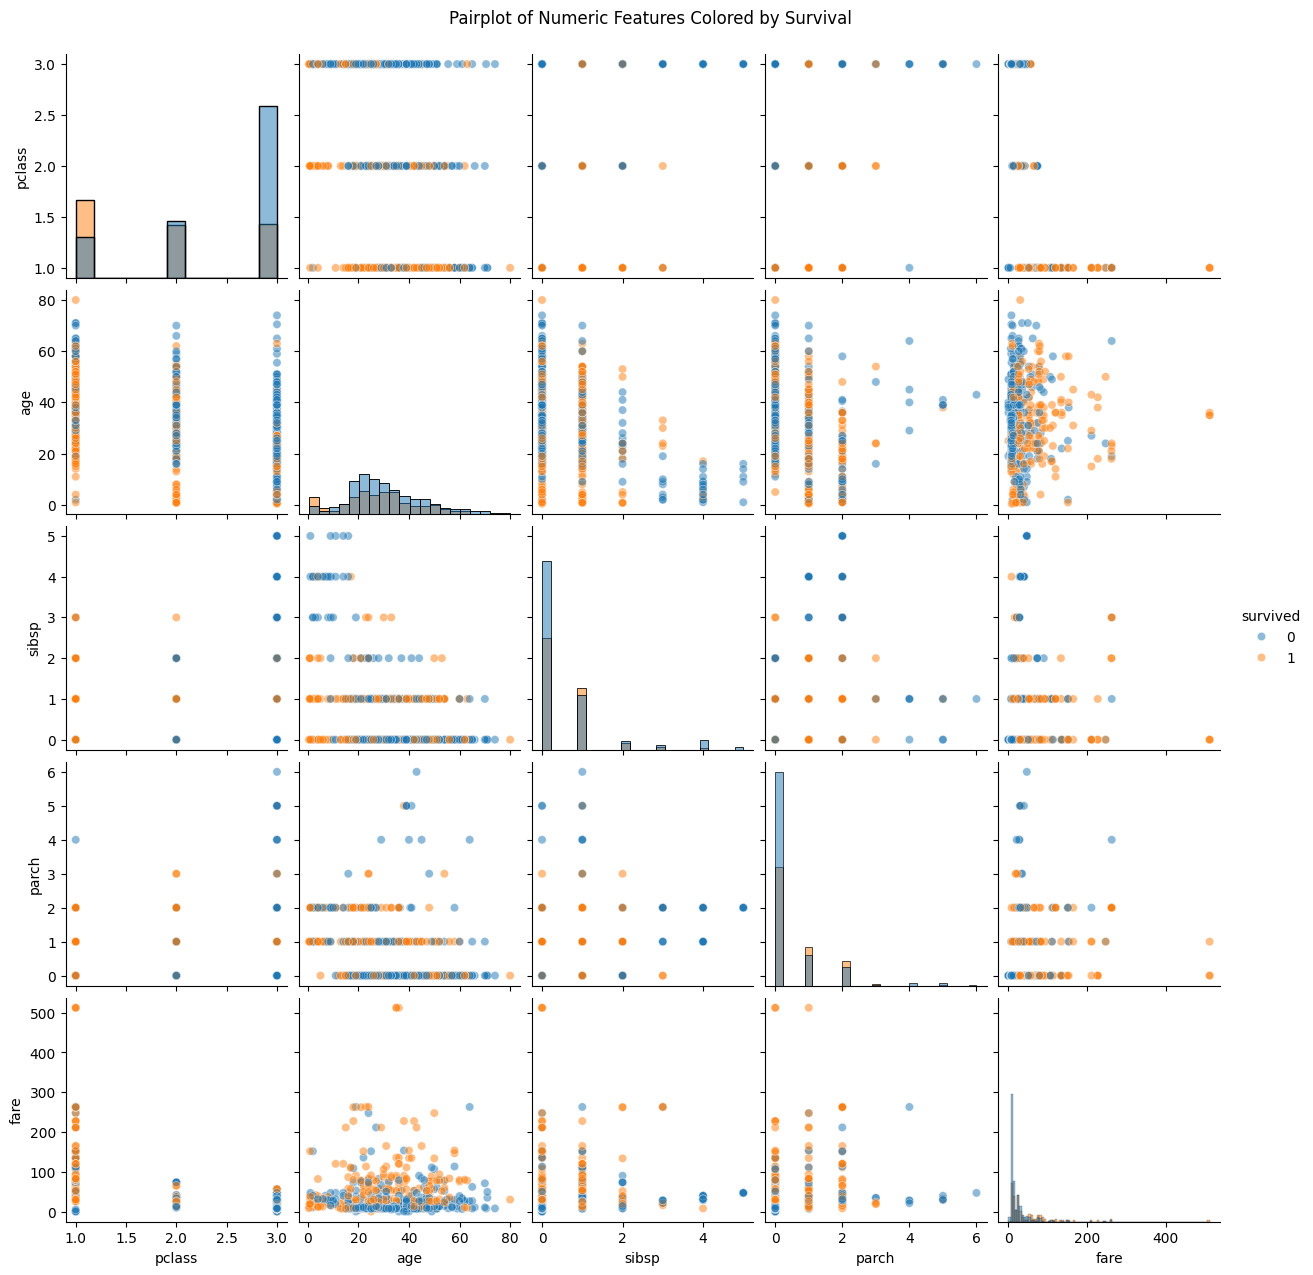

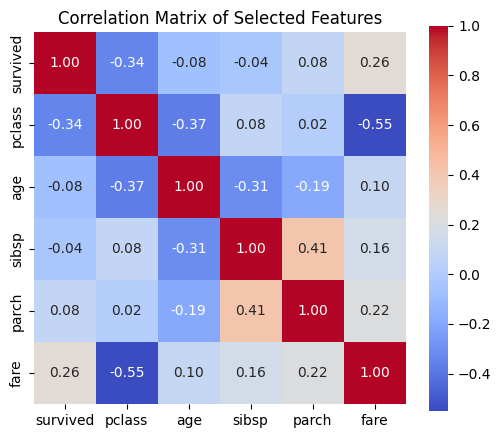


Correlation Matrix:


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [24]:
# ---------------------------------------------------------
# 13. PAIRPLOT FOR SELECTED NUMERIC FEATURES
#     We include: 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'
# ---------------------------------------------------------

sns.pairplot(
    df[ ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'] ].dropna(),
    hue='survived',
    plot_kws={'alpha': 0.5},
    diag_kind='hist'
)
plt.suptitle("Pairplot of Numeric Features Colored by Survival", y=1.02)
plt.show()


# ---------------------------------------------------------
# 14. CORRELATION MATRIX HEATMAP
# ---------------------------------------------------------

# Compute correlation matrix for the same set of columns
corr_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,      # show correlation values
    fmt='.2f',       # format to 2 decimal places
    cmap='coolwarm',
    square=True
)
plt.title("Correlation Matrix of Selected Features")
plt.show()

print("\nCorrelation Matrix:")
display(corr_matrix)


## **Observations & Patterns**

1. **Age Distribution:**  
   - The histogram for `age` shows most passengers clustered between ages 20–40, with fewer children (< 10) and fewer elderly (> 60).  

2. **Fare Distribution:**  
   - The `fare` histogram is right‐skewed: a small number of passengers paid very high fares (> 100), but most paid between 0–50.  
   - Check the boxplot for outliers; many fares are beyond 1.5×IQR on the high side.  

3. **Survival by Gender:**  
   - Females had a much higher survival rate ~74% than males ~19%.  
   - This “women and children first” policy is reflected clearly in the data.  

4. **Survival by Class:**  
   - 1st class passengers have about ~63% survival.  
   - 2nd class are around ~47%.  
   - 3rd class only ~25%.  
   - Indicates a strong socioeconomic effect on survival.  

5. **Correlation Matrix:**  
   - `survived` vs. `pclass` is negatively correlated (e.g., r ≈ −0.33).  
   - `survived` vs. `fare` is positively correlated (e.g., r ≈ +0.26).  
   - `sibsp` and `parch` correlate positively with each other (people traveling with family).  
   - Age has a weak negative correlation with survival (slightly lower chance for older passengers).  

6. **Pairplot Patterns:**  
   - You can see the clusters (or separation) between survivors and non-survivors when plotted against combinations of `pclass`, `age`, and `fare`.  
   - For example, survivors in 1st class appear to occupy a different region in (pclass vs. fare) space.  

7. **Anomalies / Missing Data:**  
   - Columns like `embarked` have a few missing values.  
   - `age` is missing for ~177 of 891 passengers.  
   - One passenger has a fare of 0 → check if that was a “deckhand”/crew or a child.


## **Inferences from EDA**

1. **Socioeconomic Status Matters**  
   - Clear evidence that 1st‐class passengers survived more often than 3rd‐class.  
   - Likely due to easier access to lifeboats and preferential treatment.

2. **Gender Gap in Survival**  
   - Dramatic difference: female survival ~74% vs. male ~19%.  
   - Confirms “women and children first” policy, though we did not break out children separately here.

3. **Fare as a Proxy for Class & Wealth**  
   - Higher fares correlate with higher survival.  
   - But because fare and class strongly correlate, make sure to disentangle if you build a model (avoid multicollinearity).

4. **Age Effects**  
   - Very young children (age < 10) show a slightly elevated survival compared to middle‐aged men.  
   - Elderly (age > 60) appear to have lower survival, though sample size is small.

5. **Family Connections**  
   - You might notice that people traveling with “just one sibling/spouse” had slightly better survival than those traveling alone or with large families.  
   - This suggests “family size” could become a useful new feature in modeling.

_End of EDA Notebook._